In [80]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
original_data=pd.read_csv("train.csv")
original_data.shape

(2000, 21)

In [81]:
X=original_data.drop(columns="price_range")
X=np.array(X)
# distance.shape

In [82]:
class DBSCAN:
    def __init__(self,X,Eps,mn_point,number_of_cluster):
        self.X=X
        self.distance=None
        self.Eps=Eps
        self.mn_point=mn_point
        self.matrix=None
        self.core_point=None
        self.type_of_point=None
        self.vis=None
        self.cluster=None
        self.number_of_cluster=number_of_cluster
    def Euclidean_Distance(self,row1,row2):
        row1=np.array(row1)
        row2=np.array(row2)
        ans=0.0
        for i in range(row1.shape[0]):
            ans=ans+((row1[i]-row2[i])**2)
        return np.sqrt(ans)    
    def fit(self):
        self.distance=np.zeros((self.X.shape[0],self.X.shape[0]))
        for i in range(self.X.shape[0]):
            for j in range(self.X.shape[0]):
                if(i==j):
                    continue
                self.distance[i][j]=self.Euclidean_Distance(self.X[i],self.X[j])
        print(self.distance[:5, :5])
    def build(self):
        self.matrix=[[]for _ in range(self.X.shape[0])]
        for i in range(self.distance.shape[0]):
            self.matrix[i].append(i)
            for j in range(self.distance[0].shape[0]):
                if(i==j):continue
                if self.distance[i][j]<=self.Eps:
                   self.matrix[i].append(j)
        self.core_point=[]
        self.type_of_point=["Noise point" for _ in range(2000)]      
        for i in range(len(self.type_of_point)):
            if len(self.matrix[i])>=self.mn_point:
                self.core_point.append(i)
                self.type_of_point[i]="core point"
        size_border_point=self.type_of_point.count("Noise point")            
        for i in range(len(self.type_of_point)):
            if(self.type_of_point[i]=="Noise point"):
                for j in range(len(self.core_point)):
                    if self.matrix[i].count(self.core_point[j])>0:
                        self.type_of_point[i]="border point"
                        break
        size_noise_point=self.type_of_point.count("Noise point")                
        size_border_point=size_border_point-size_noise_point
        print(f"size_of_core point = {len(self.core_point)} , size_of_border_point = {size_border_point} and size_of_Noise_point before applying clusters = {size_noise_point}")           

    def connect(self):
        self.cluster = [[] for _ in range(self.number_of_cluster)]
        self.vis=[0 for i in range(self.X.shape[0])]
        def dfs(i,cluster1=[]):
            if self.vis[i] == 1:
                return
            self.vis[i] = 1
            for j in range(len(self.matrix[i])):
                dfs(self.matrix[i][j], cluster1)
            cluster1.append(i)
            return cluster1
        cnt=0
        for i in range(len(self.type_of_point)):
            clusteri = list()
            if self.type_of_point[i] == "core point" and self.vis[i] == 0:
                clusteri = dfs(i)
            if len(clusteri) >= self.mn_point:
                print(f"i={i} len= {len(clusteri)}")
                for j in range(len(clusteri)):
                    self.cluster[cnt].append(clusteri[j])
                cnt=cnt+1
                clusteri.clear()
        print(len(self.cluster))
    def plot_all_sample(self,x,y,z):
        colors=sns.color_palette('dark', self.number_of_cluster+1)
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        for i in range(self.X.shape[0]):
            c=self.number_of_cluster
            for j in range(len(self.cluster)):
                if self.cluster[j].count(i)==1:
                    c=j
            ax.scatter(self.X[i][x],self.X[i][y],self.X[i][z],color=colors[c],s=50)    
        ax.set_title('Clusters and Outliers Plot')
        ax.set_xlabel('ram')
        ax.set_ylabel('battary power')
        ax.set_zlabel('px_width')    
        plt.show()       
    def  plot_three_sample(self,x,y,z):
        freq=[0 for i in range(self.number_of_cluster+1)]
        fig = plt.figure(figsize=(10, 8))
        colors=sns.color_palette('dark', self.number_of_cluster+1)
        ax = fig.add_subplot(111, projection='3d')
        for i in range(self.X.shape[0]):
            c=self.number_of_cluster
            for j in range(len(self.cluster)):
                if self.cluster[j].count(i)==1:
                    c=j
            if(freq[c]!=3):       
                ax.scatter(self.X[i][x],self.X[i][y],self.X[i][z],color=colors[c],s=50)
                freq[c]=freq[c]+1    
        ax.set_title('Clusters and Outliers Plot')
        ax.set_xlabel('ram')
        ax.set_ylabel('battary power')
        ax.set_zlabel('px_width')    
        plt.show()    
                      
            
            


In [83]:
Eps=280
mn_point=4
Db=DBSCAN(X,Eps,mn_point,9)

In [84]:
Db.fit()

[[   0.         1531.30170117 1597.05196534 1610.80294574 1968.92838874]
 [1531.30170117    0.          642.62745039  568.63521699 1680.14061911]
 [1597.05196534  642.62745039    0.          196.49938931 1805.75042019]
 [1610.80294574  568.63521699  196.49938931    0.         1905.18390976]
 [1968.92838874 1680.14061911 1805.75042019 1905.18390976    0.        ]]


In [85]:
# X.shape
Db.build()

size_of_core point = 1492 , size_of_border_point = 334 and size_of_Noise_point before applying clusters = 174


In [86]:
Db.connect()

i=0 len= 1790
i=66 len= 16
i=109 len= 9
i=158 len= 38
i=260 len= 4
i=289 len= 4
i=882 len= 4
i=1534 len= 5
i=1997 len= 7
9


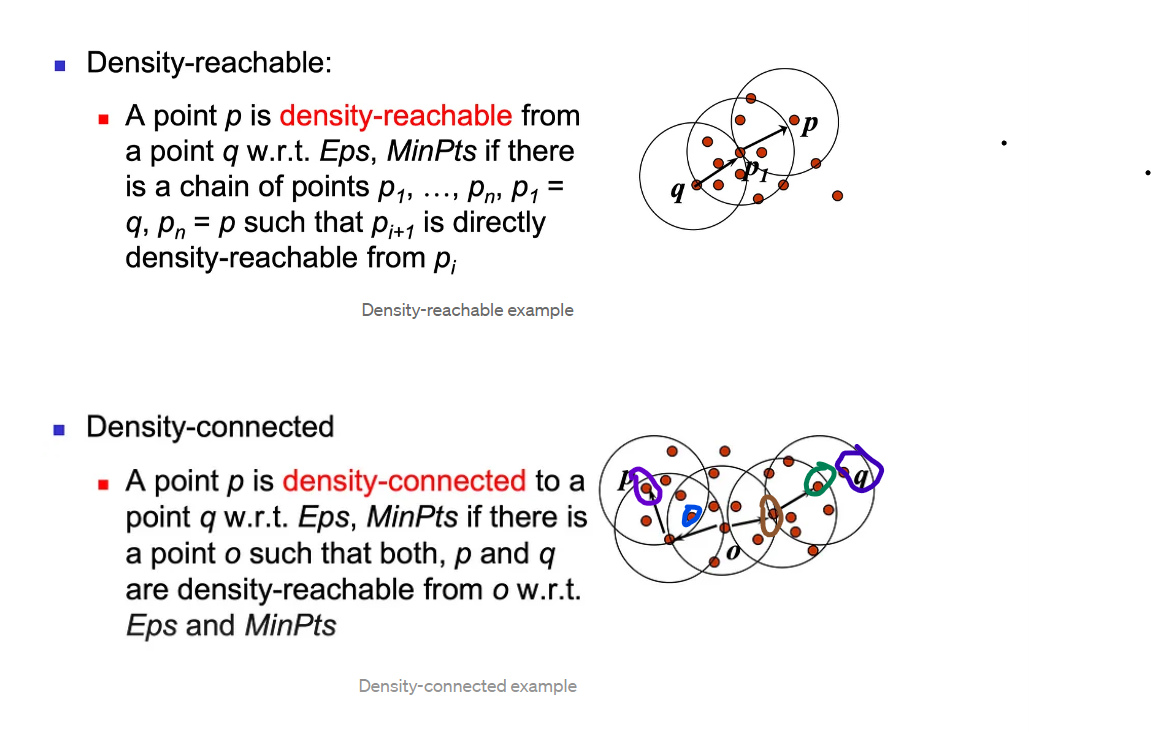

In [87]:
from PIL import Image
image_of_dbscan_connection=Image.open("image_of_dbscan.png")
image_of_dbscan_connection

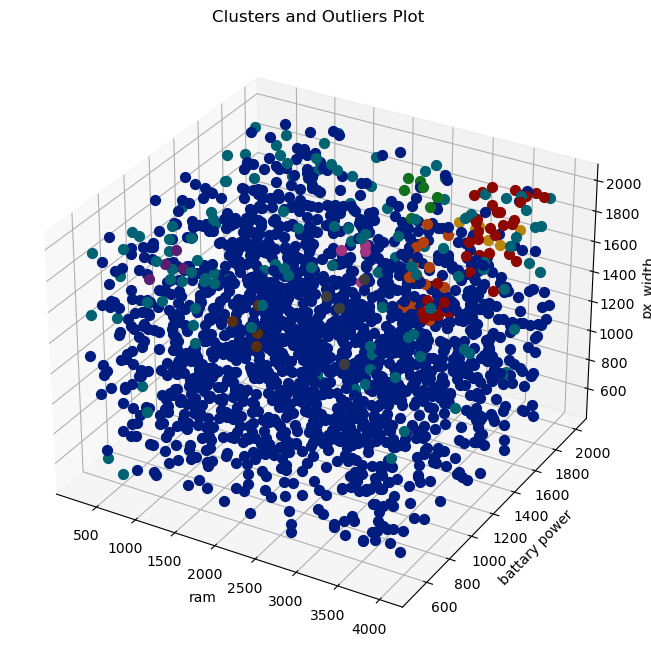

In [88]:
Db.plot_all_sample(13,0,12)

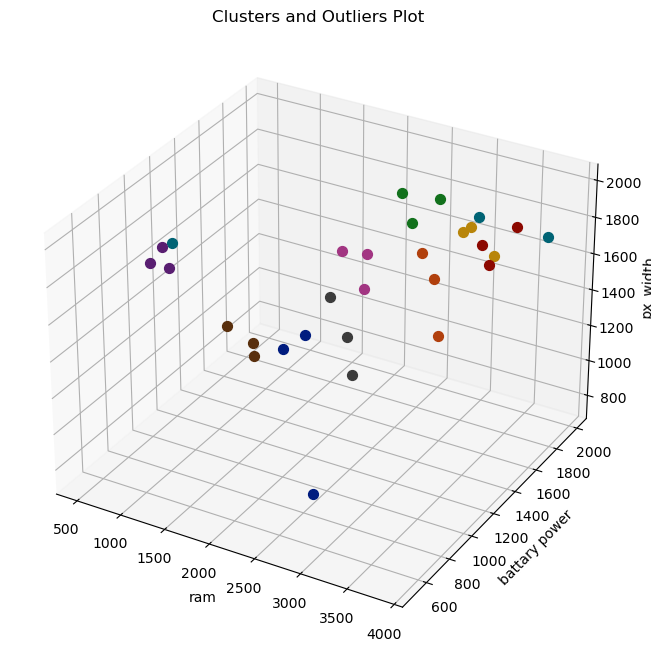

In [89]:
Db.plot_three_sample(13,0,12)

applying pca

In [91]:
X_data=original_data.drop(columns="price_range")
X_data=np.array(X_data)

In [102]:
class PCA:
    def __init__(self,num_components=None,X=None):
        self.num_components=num_components
        self.X=X
        self.X_transpose=None
        self.Q_matrix=None
        self.F_constructed=None
        self.mean=None
        self.sorted_eigenvalue=None
        self.sorted_eigenvectors=None
    def fit(self):
        self.mean=np.mean(self.X,axis=0)
        self.X=self.X-self.mean
        self.X_transpose=self.X.T
        C=self.X_transpose@self.X*(1/self.X.shape[1])
        eigen_value,eigen_vector=np.linalg.eig(C)
        for i in range(eigen_vector.shape[0]):
            normalize=0.0
            for j in range(eigen_vector.shape[0]):
                normalize=normalize+eigen_vector[j][i]**2
            normalize=np.sqrt(normalize)
            for j in range(eigen_vector.shape[0]):
                eigen_vector[j][i]=eigen_vector[j][i]/normalize
        sorted_indices = np.argsort(eigen_value)[::-1]
        self.sorted_eigenvalue = eigen_value[sorted_indices]
        self.sorted_eigenvectors = eigen_vector[:, sorted_indices] 
        self.Q_matrix = self.sorted_eigenvectors[:, :self.num_components]
        print(f"shape Q_matrix ={self.Q_matrix.shape}")
    def transform(self):
        self.F_constructed=self.X_transpose.T@self.Q_matrix
        print(f"shape reduction ={self.F_constructed.shape}")
        return self.F_constructed
    def inverse_transform(self):
        self.mean=self.mean.reshape((20,1))
        F_reconstructed=self.Q_matrix@self.F_constructed.T+self.mean
        print(f"F_reconstructed data ={F_reconstructed.shape}")
        return F_reconstructed.T

In [103]:
num_components=4
pca1=PCA(num_components,X_data)
pca1.fit()
F_constructed1=pca1.transform()
reconstructed1=pca1.inverse_transform()

shape Q_matrix =(20, 4)
shape reduction =(2000, 4)
F_reconstructed data =(20, 2000)


In [105]:
Db2=DBSCAN(F_constructed1,Eps,mn_point,6)

In [106]:
Db2.fit()

[[   0.         1529.63591936 1596.06604828 1609.7378904  1967.92230889]
 [1529.63591936    0.          642.39585419  566.87772268 1679.99803762]
 [1596.06604828  642.39585419    0.          193.31472801 1805.68163265]
 [1609.7378904   566.87772268  193.31472801    0.         1904.76752364]
 [1967.92230889 1679.99803762 1805.68163265 1904.76752364    0.        ]]


In [107]:
Db2.build()

size_of_core point = 1553 , size_of_border_point = 300 and size_of_Noise_point before applying clusters = 147


In [108]:
Db2.connect()

i=0 len= 1868
i=90 len= 10
i=260 len= 4
i=289 len= 4
i=882 len= 4
i=1534 len= 5
6


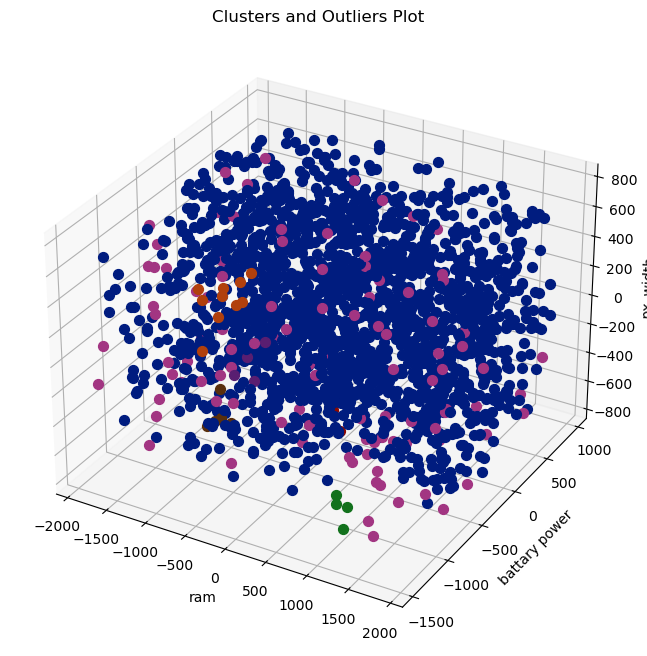

In [109]:
Db2.plot_all_sample(0,1,2)

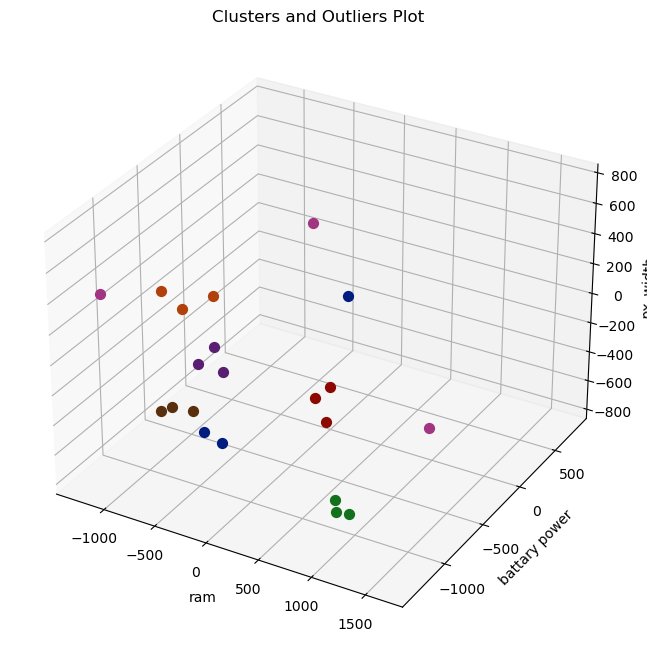

In [110]:
Db2.plot_three_sample(0,1,2)